In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

config = {"figure.dpi": 300,
          "font.family": 'serif',
          "font.serif": ['SimSun']}
df = pd.read_csv('analysis/anova_visualization.csv', encoding='utf-8-sig')
df['sort_index'] = df['level'].map({'不倾向':0,
                                    '倾向':1,
                                    '低':0,
                                    '中':1,
                                    '高':2,
                                    '单供应商':0,
                                    '双供应商':1,
                                    '三供应商':2})
df.sort_values(['自变量', 'sort_index'], inplace=True)
df.drop(columns='sort_index', inplace=True)
df

自变量 level  系统恢复用时R1  产业-企业边累计扰乱次数R2  产业-企业边最大传导深度R3  产业-企业边断裂总数R4
15  新供应关系构成概率P7     低     2.240           2.672           1.143        0.7640
16  新供应关系构成概率P7     中     2.132           2.674           1.143        0.7859
17  新供应关系构成概率P7     高     2.179           2.649           1.124        0.7575
9    是否已有连接偏好P4   不倾向     2.177           2.668           1.141        0.7804
8    是否已有连接偏好P4    倾向     2.191           2.663           1.133        0.7579
4      是否规模偏好P2   不倾向     2.171           2.669           1.137        0.7726
3      是否规模偏好P2    倾向     2.196           2.661           1.137        0.7657
18    最大尝试时间步P8     低     1.726           2.646           1.123        0.7782
19    最大尝试时间步P8     中     2.186           2.682           1.144        0.7599
20    最大尝试时间步P8     高     2.640           2.667           1.143        0.7694
7      最大尝试次数P3     低     2.286           2.691           1.154        0.8254
6      最大尝试次数P3     中     2.124           2.652           1.127        0.7431
5      最大尝试次数P3     高     2.141           2.652           1.130        0.7390
2        采购策略P1  单供应商     2.261           2.519           1.121        0.7919
1        采购策略P1  双供应商     2.146           2.650           1.133        0.7615
0        采购策略P1  三供应商     2.144           2.826           1.156        0.7541
10     额外产能分布P5  均匀分布     2.316           2.681           1.158        0.8403
11     额外产能分布P5  正态分布     2.052           2.650           1.115        0.6980
14   额外产能分布参数P6     低     2.436           2.705           1.171        0.9121
13   额外产能分布参数P6     中     2.202           2.666           1.142        0.7655
12   额外产能分布参数P6     高     1.914           2.624           1.098        0.6299

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27216\1808291987.py:10: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",


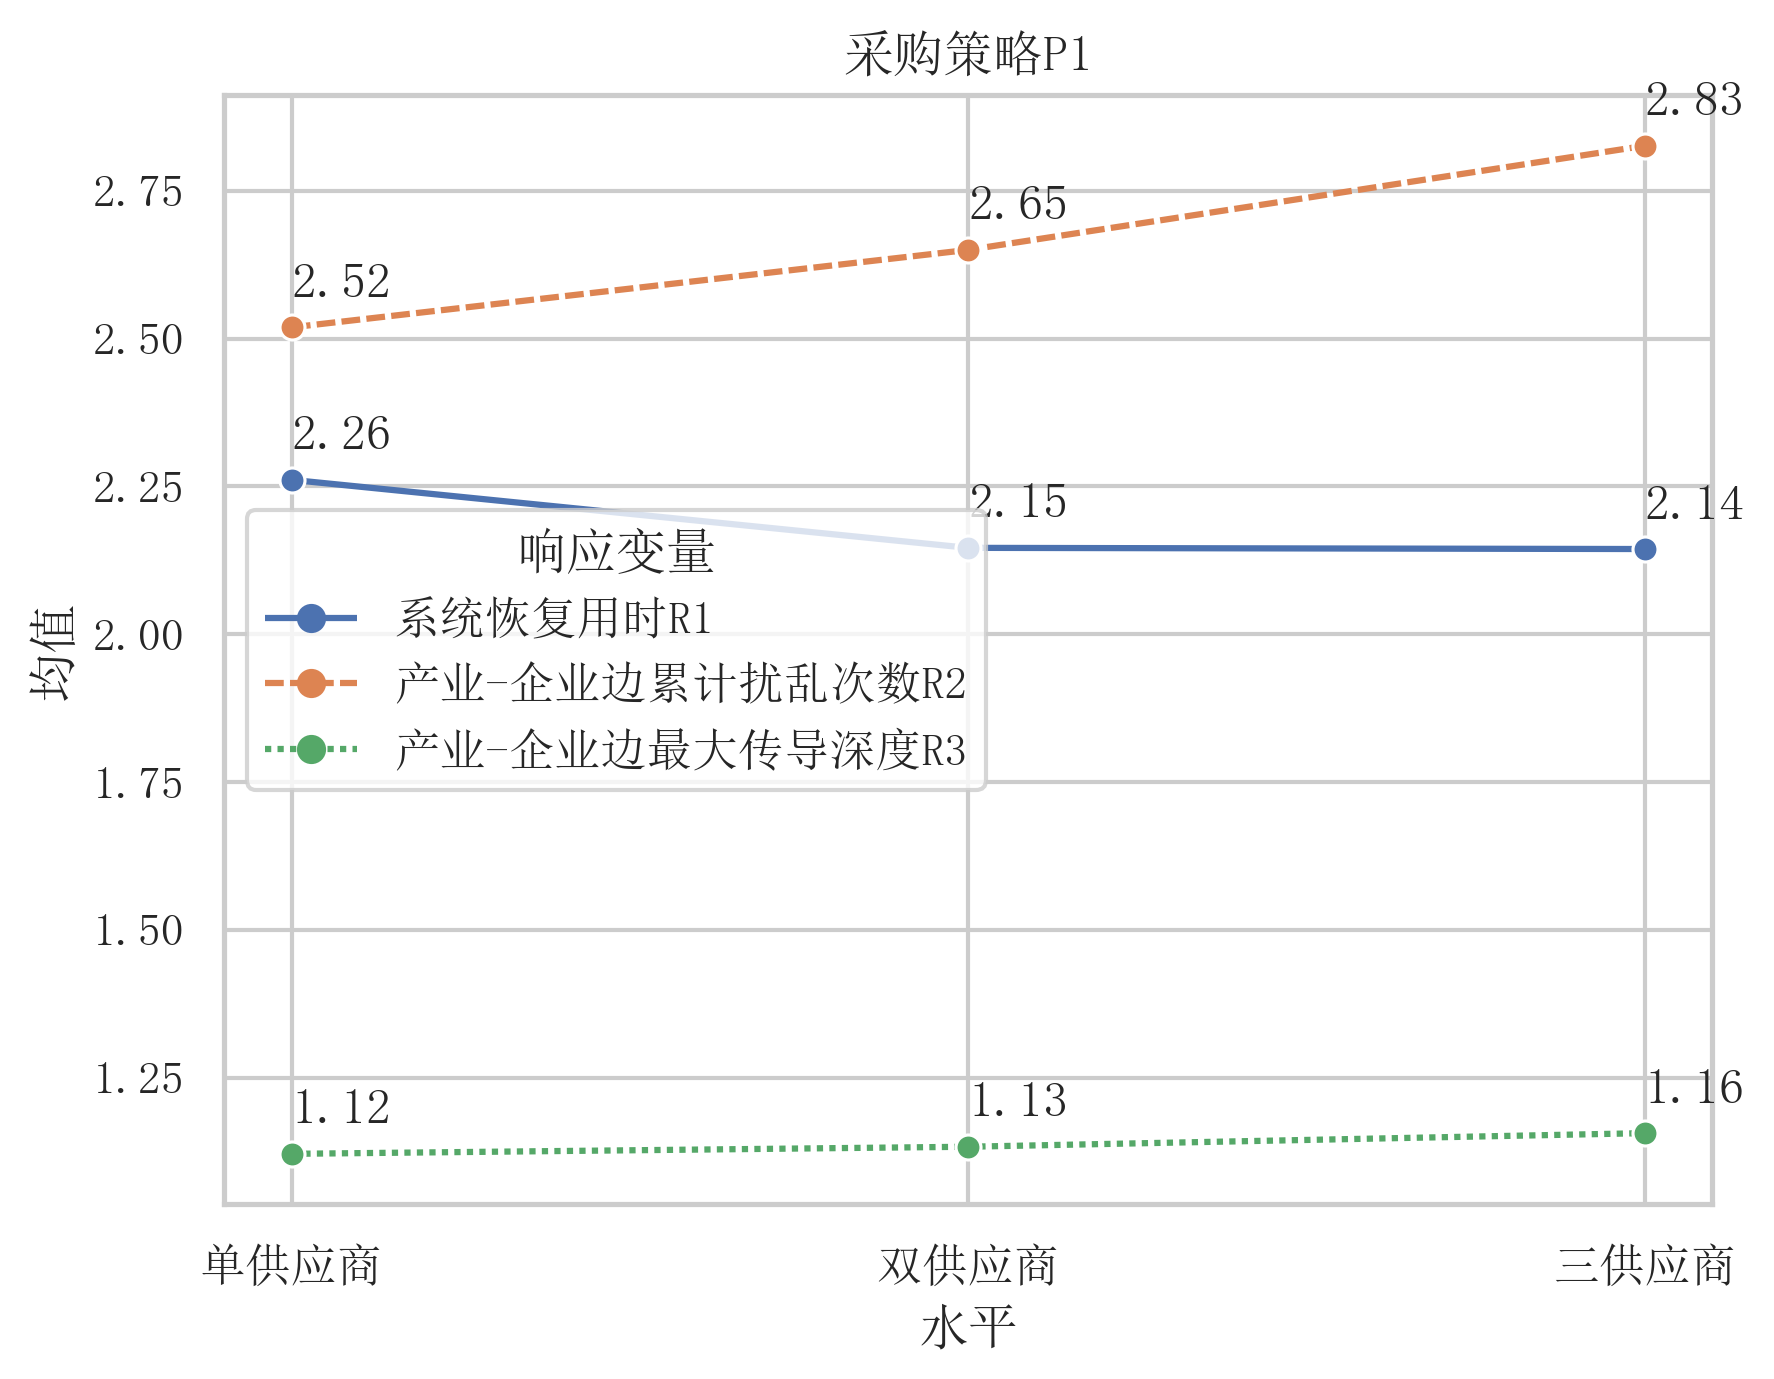

In [11]:
x_name = '采购策略P1'
y_choose = [0, 1, 2]
y_prop = pd.DataFrame({'y_name': ['系统恢复用时R1', '产业-企业边累计扰乱次数R2', '产业-企业边最大传导深度R3', '产业-企业边断裂总数R4'],
                       'line_style': [(1, 0),(3, 1), (1,1), (3,2,1,2)],
                       'palette': sns.color_palette("deep")[0:4]})
df_x = df.loc[df['自变量'] == x_name, 'level':].set_index('level').stack(
).reset_index().rename(columns={'level': '水平', 'level_1': '响应变量', 0: '均值'})
df_x = df_x.loc[df_x['响应变量'].isin(y_prop.loc[y_choose]['y_name'])]
sns.set_theme(style="whitegrid", rc=config)
ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",
                  markers=['o'],
                  dashes=y_prop.loc[y_choose]['line_style'].to_list(),
                  palette=y_prop.loc[y_choose]['palette'].to_list(),
                  legend='brief')
ax.set_title(x_name)
for item in df_x.groupby('响应变量'):
    for x, y, m in item[1][['水平', '均值', '均值']].values:
        ax.text(x, y+0.05, f'{m:.2f}')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27216\1224603408.py:10: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",


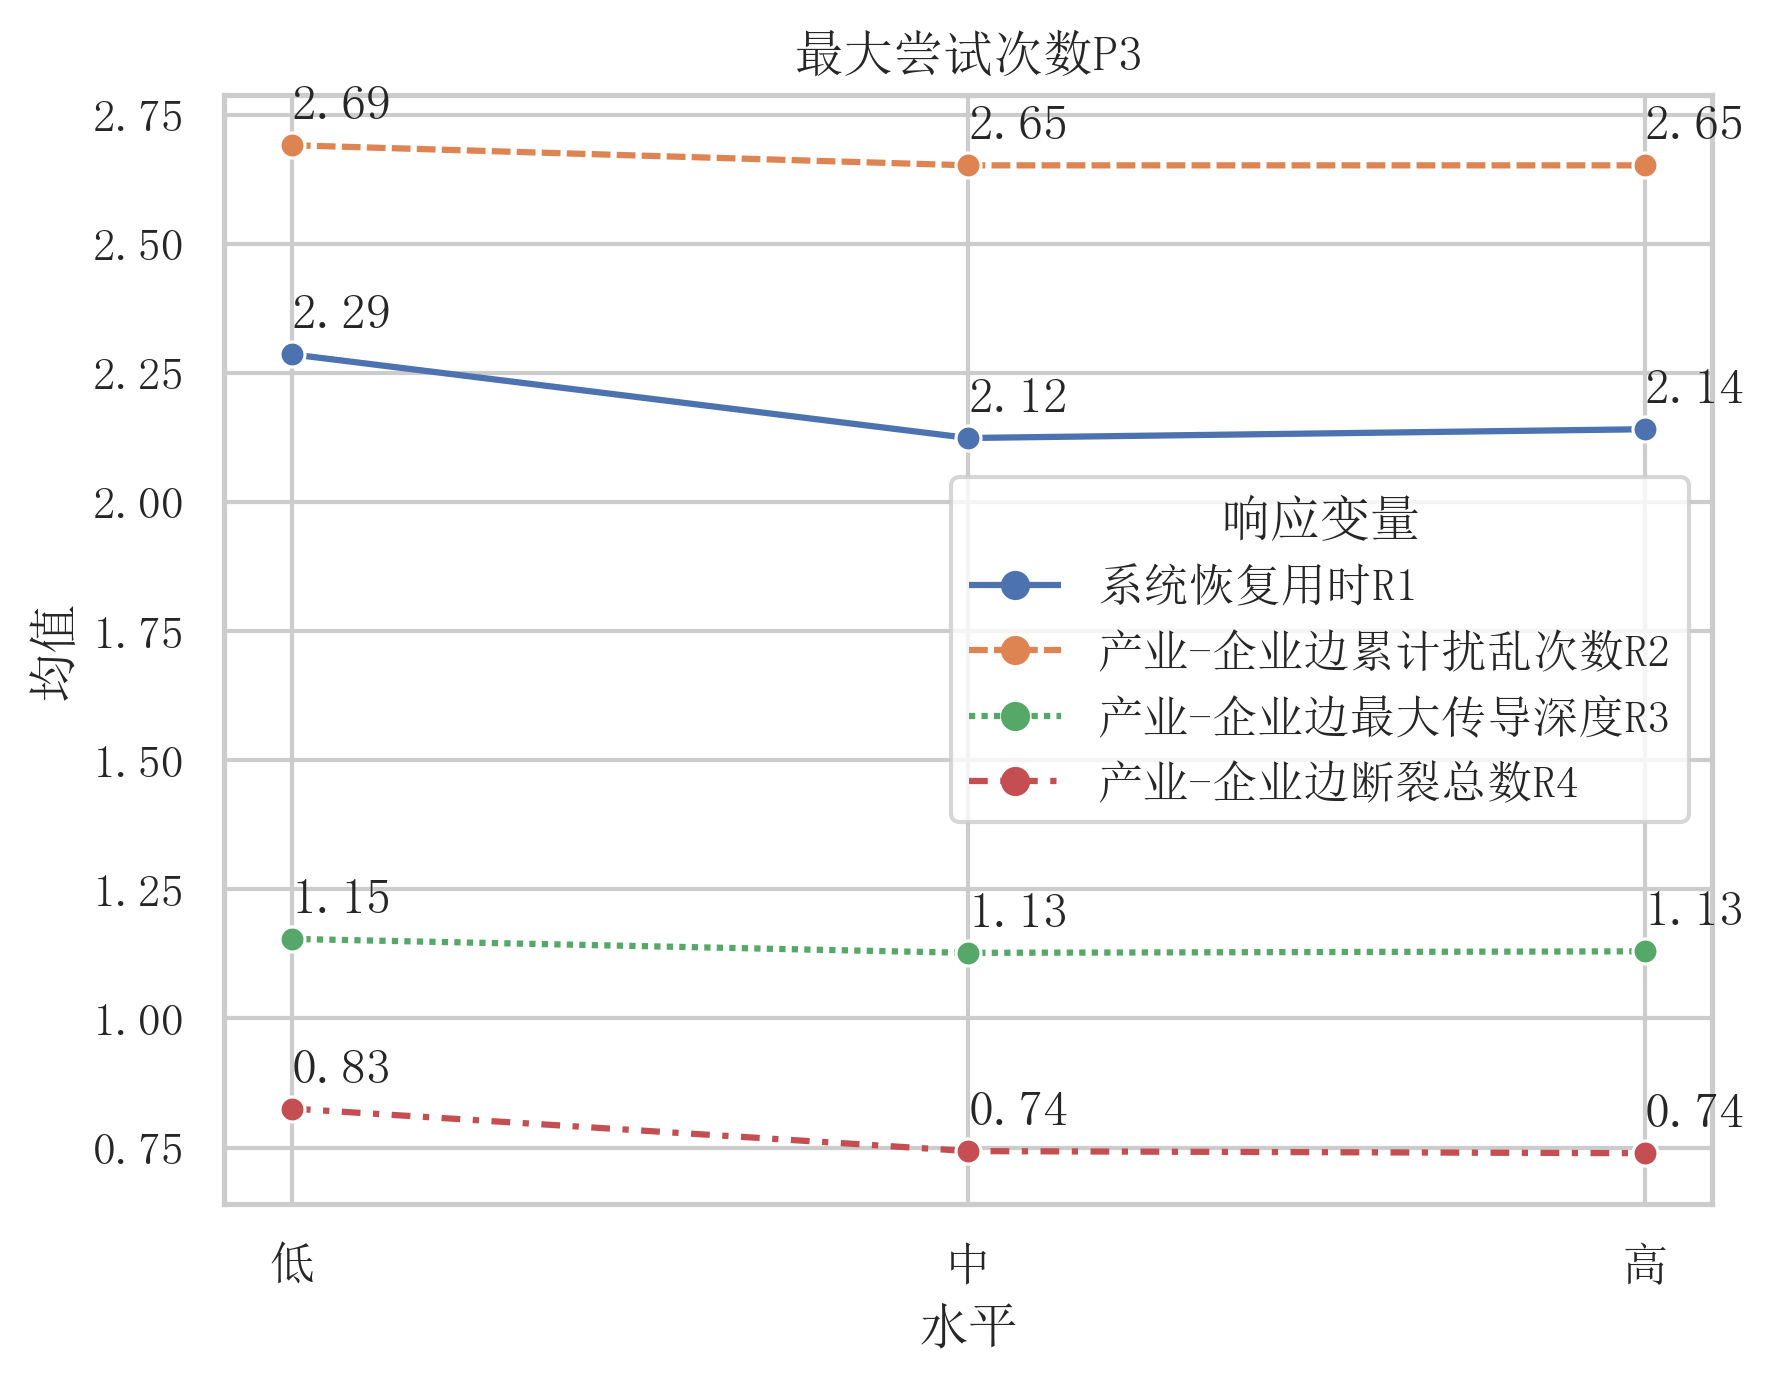

In [12]:
x_name = '最大尝试次数P3'
y_choose = [0, 1, 2, 3]
y_prop = pd.DataFrame({'y_name': ['系统恢复用时R1', '产业-企业边累计扰乱次数R2', '产业-企业边最大传导深度R3', '产业-企业边断裂总数R4'],
                       'line_style': [(1, 0),(3, 1), (1,1), (3,2,1,2)],
                       'palette': sns.color_palette("deep")[0:4]})
df_x = df.loc[df['自变量'] == x_name, 'level':].set_index('level').stack(
).reset_index().rename(columns={'level': '水平', 'level_1': '响应变量', 0: '均值'})
df_x = df_x.loc[df_x['响应变量'].isin(y_prop.loc[y_choose]['y_name'])]
sns.set_theme(style="whitegrid", rc=config)
ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",
                  markers=['o'],
                  dashes=y_prop.loc[y_choose]['line_style'].to_list(),
                  palette=y_prop.loc[y_choose]['palette'].to_list(),
                  legend='brief')
ax.set_title(x_name)
for item in df_x.groupby('响应变量'):
    for x, y, m in item[1][['水平', '均值', '均值']].values:
        ax.text(x, y+0.05, f'{m:.2f}')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27216\2665207915.py:10: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",


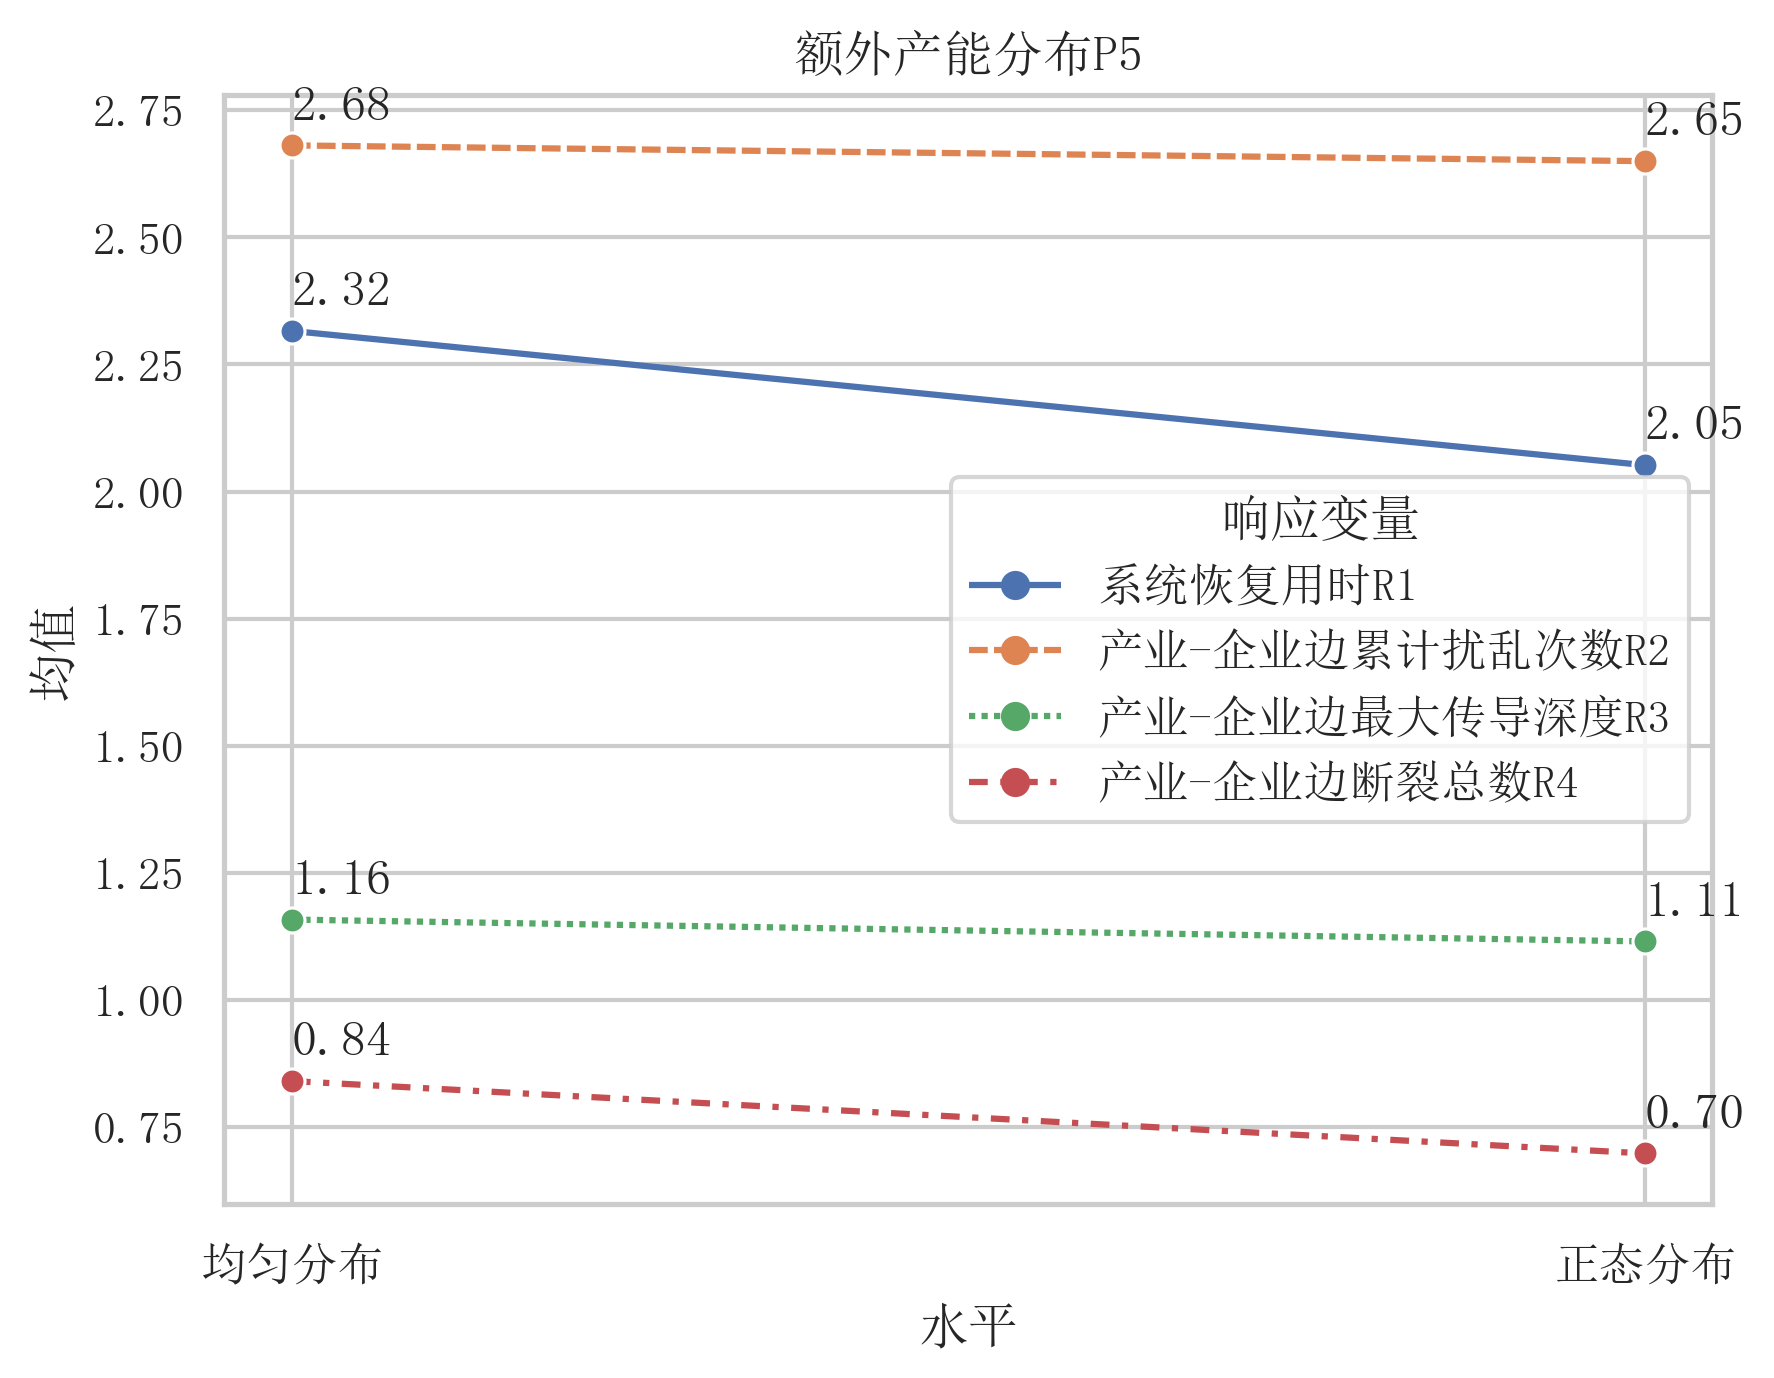

In [13]:
x_name = '额外产能分布P5'
y_choose = [0, 1, 2, 3]
y_prop = pd.DataFrame({'y_name': ['系统恢复用时R1', '产业-企业边累计扰乱次数R2', '产业-企业边最大传导深度R3', '产业-企业边断裂总数R4'],
                       'line_style': [(1, 0),(3, 1), (1,1), (3,2,1,2)],
                       'palette': sns.color_palette("deep")[0:4]})
df_x = df.loc[df['自变量'] == x_name, 'level':].set_index('level').stack(
).reset_index().rename(columns={'level': '水平', 'level_1': '响应变量', 0: '均值'})
df_x = df_x.loc[df_x['响应变量'].isin(y_prop.loc[y_choose]['y_name'])]
sns.set_theme(style="whitegrid", rc=config)
ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",
                  markers=['o'],
                  dashes=y_prop.loc[y_choose]['line_style'].to_list(),
                  palette=y_prop.loc[y_choose]['palette'].to_list(),
                  legend='brief')
ax.set_title(x_name)
for item in df_x.groupby('响应变量'):
    for x, y, m in item[1][['水平', '均值', '均值']].values:
        ax.text(x, y+0.05, f'{m:.2f}')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27216\759130329.py:10: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",


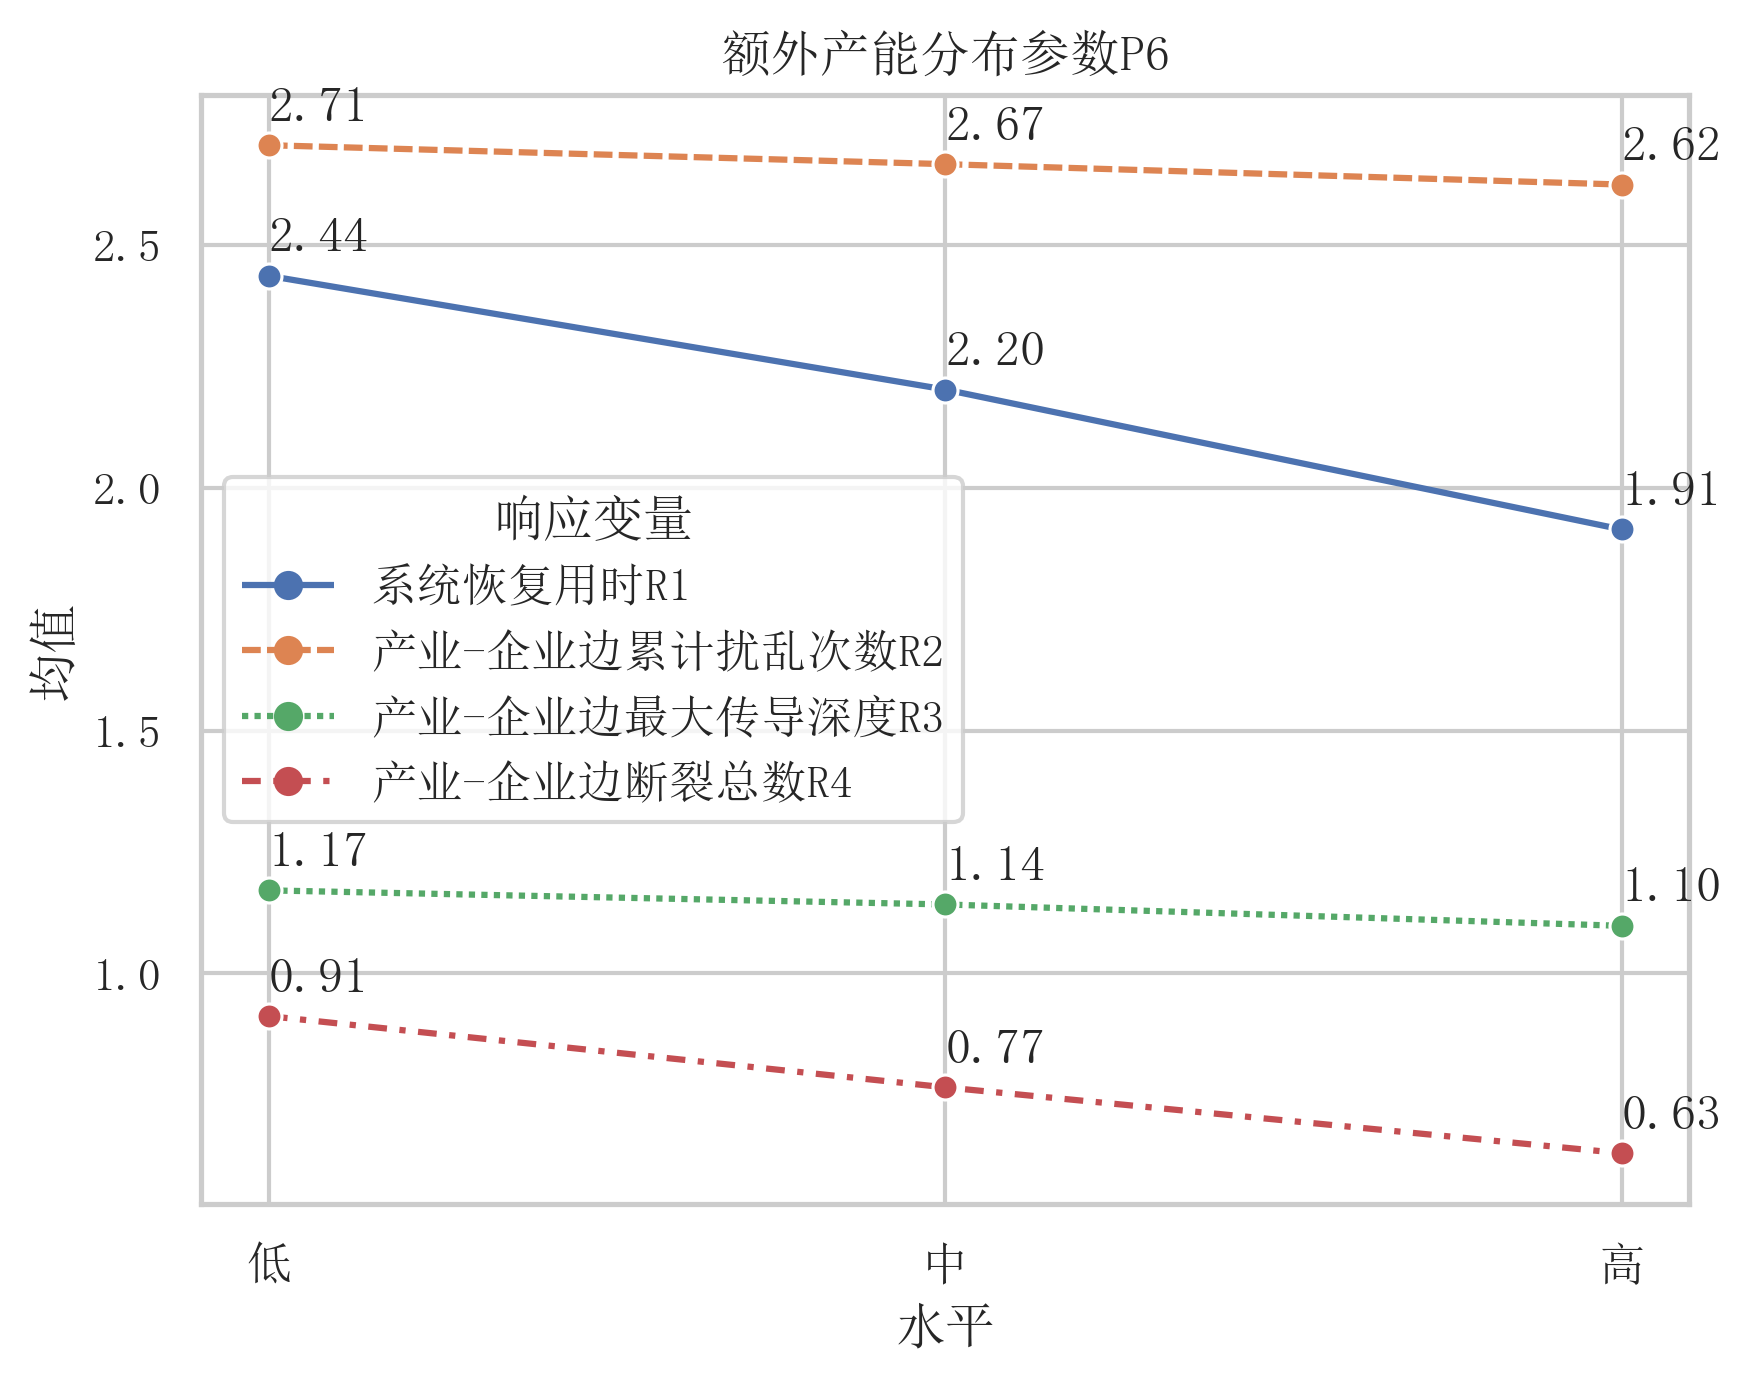

In [14]:
x_name = '额外产能分布参数P6'
y_choose = [0, 1, 2, 3]
y_prop = pd.DataFrame({'y_name': ['系统恢复用时R1', '产业-企业边累计扰乱次数R2', '产业-企业边最大传导深度R3', '产业-企业边断裂总数R4'],
                       'line_style': [(1, 0),(3, 1), (1,1), (3,2,1,2)],
                       'palette': sns.color_palette("deep")[0:4]})
df_x = df.loc[df['自变量'] == x_name, 'level':].set_index('level').stack(
).reset_index().rename(columns={'level': '水平', 'level_1': '响应变量', 0: '均值'})
df_x = df_x.loc[df_x['响应变量'].isin(y_prop.loc[y_choose]['y_name'])]
sns.set_theme(style="whitegrid", rc=config)
ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",
                  markers=['o'],
                  dashes=y_prop.loc[y_choose]['line_style'].to_list(),
                  palette=y_prop.loc[y_choose]['palette'].to_list(),
                  legend='brief')
ax.set_title(x_name)
for item in df_x.groupby('响应变量'):
    for x, y, m in item[1][['水平', '均值', '均值']].values:
        ax.text(x, y+0.05, f'{m:.2f}')

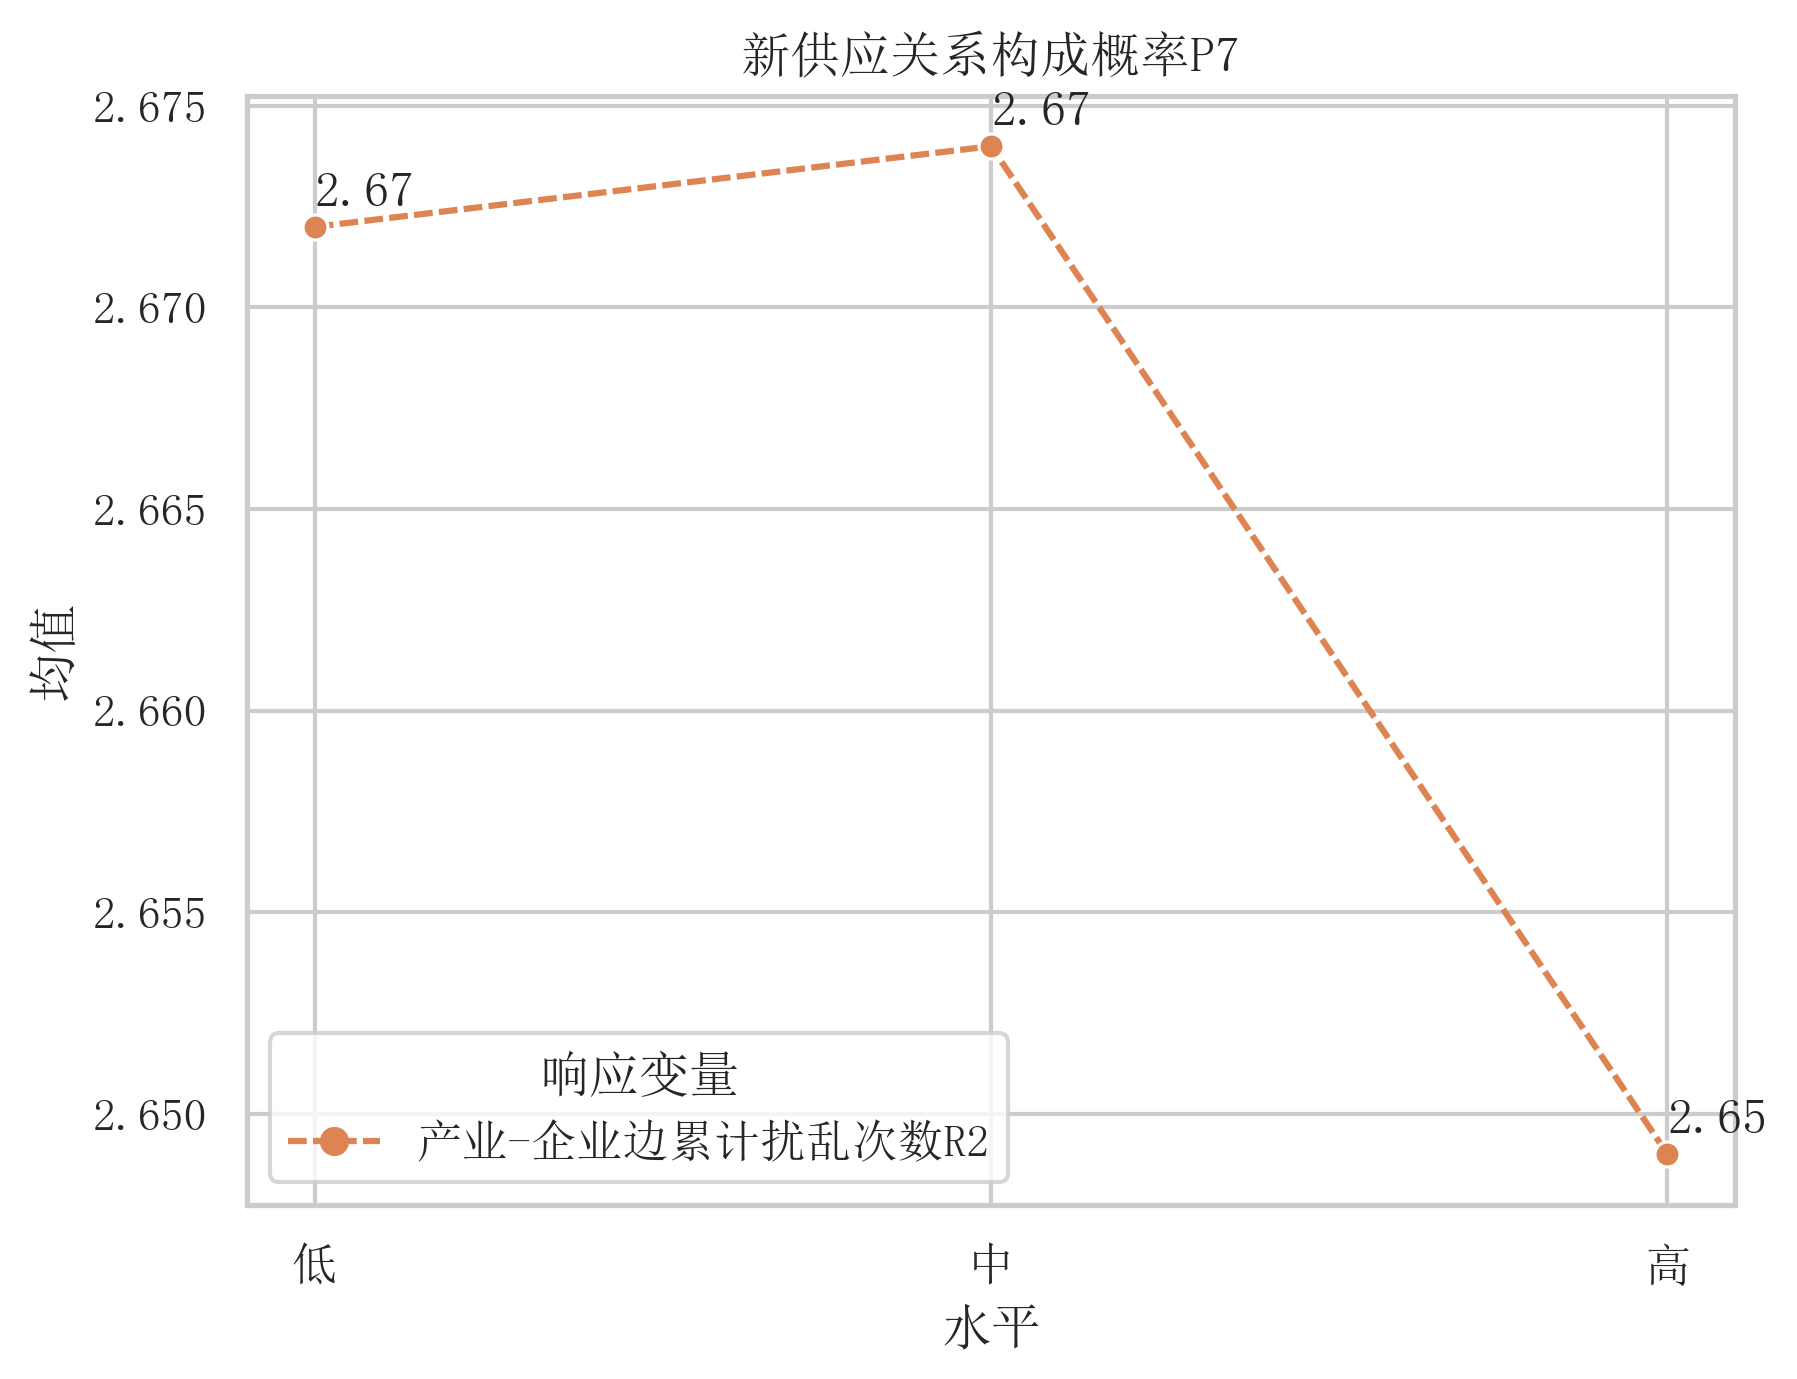

In [17]:
x_name = '新供应关系构成概率P7'
y_choose =[1]
y_prop = pd.DataFrame({'y_name': ['系统恢复用时R1', '产业-企业边累计扰乱次数R2', '产业-企业边最大传导深度R3', '产业-企业边断裂总数R4'],
                       'line_style': [(1, 0),(3, 1), (1,1), (3,2,1,2)],
                       'palette': sns.color_palette("deep")[0:4]})
df_x = df.loc[df['自变量'] == x_name, 'level':].set_index('level').stack(
).reset_index().rename(columns={'level': '水平', 'level_1': '响应变量', 0: '均值'})
df_x = df_x.loc[df_x['响应变量'].isin(y_prop.loc[y_choose]['y_name'])]
sns.set_theme(style="whitegrid", rc=config)
ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",
                  markers=['o'],
                  dashes=y_prop.loc[y_choose]['line_style'].to_list(),
                  palette=y_prop.loc[y_choose]['palette'].to_list(),
                  legend='brief')
ax.set_title(x_name)
for item in df_x.groupby('响应变量'):
    for x, y, m in item[1][['水平', '均值', '均值']].values:
        ax.text(x, y+0.0005, f'{m:.2f}')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27216\1838672856.py:10: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",


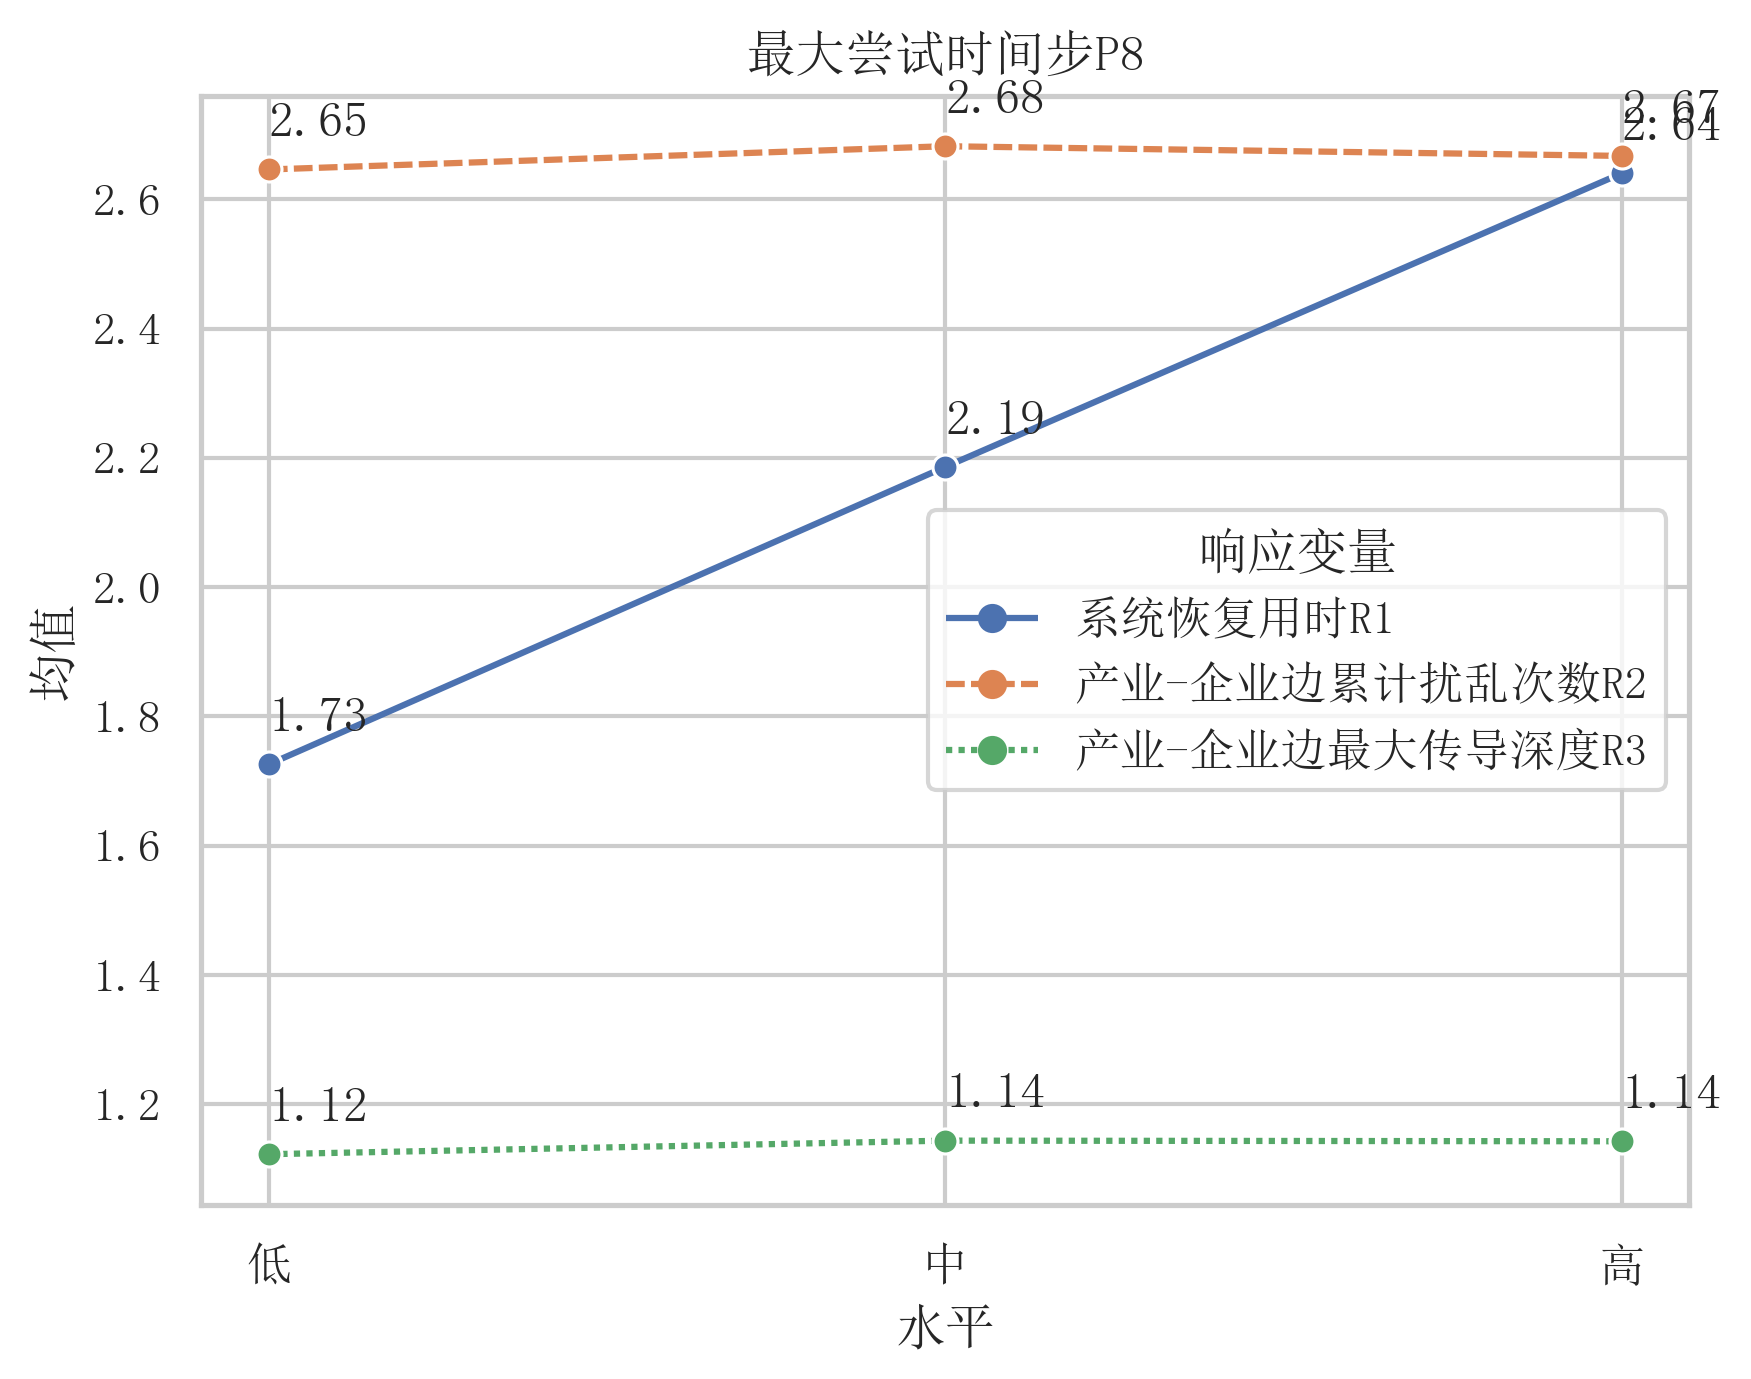

In [18]:
x_name = '最大尝试时间步P8'
y_choose=[0,1,2]
y_prop = pd.DataFrame({'y_name': ['系统恢复用时R1', '产业-企业边累计扰乱次数R2', '产业-企业边最大传导深度R3', '产业-企业边断裂总数R4'],
                       'line_style': [(1, 0),(3, 1), (1,1), (3,2,1,2)],
                       'palette': sns.color_palette("deep")[0:4]})
df_x = df.loc[df['自变量'] == x_name, 'level':].set_index('level').stack(
).reset_index().rename(columns={'level': '水平', 'level_1': '响应变量', 0: '均值'})
df_x = df_x.loc[df_x['响应变量'].isin(y_prop.loc[y_choose]['y_name'])]
sns.set_theme(style="whitegrid", rc=config)
ax = sns.lineplot(data=df_x, x="水平", y="均值", hue="响应变量", style="响应变量",
                  markers=['o'],
                  dashes=y_prop.loc[y_choose]['line_style'].to_list(),
                  palette=y_prop.loc[y_choose]['palette'].to_list(),
                  legend='brief')
ax.set_title(x_name)
for item in df_x.groupby('响应变量'):
    for x, y, m in item[1][['水平', '均值', '均值']].values:
        ax.text(x, y+0.05, f'{m:.2f}')